<a href="https://colab.research.google.com/github/burntato/PCVK_Genap_2023/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
Masukkan nilai kecerahan: 50


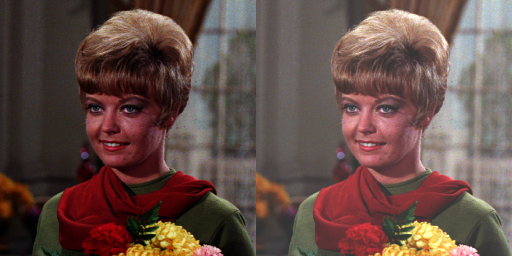

In [4]:
print(' Mengubah tingkat kecerahan citra ')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


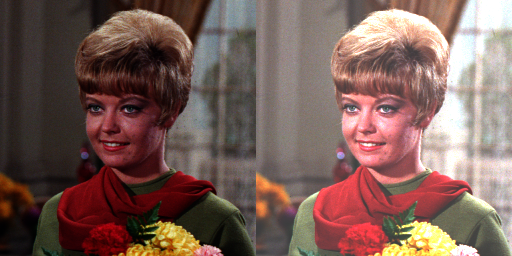

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')

try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # a * f(x, y) + b
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)
     

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
Masukan nilai kecerahan: 40


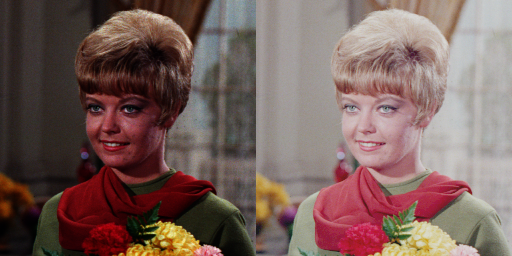

In [7]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # s = c * log(1 + r)
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

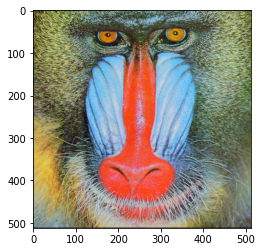

In [27]:
img_def = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_def = cv.cvtColor(img_def,cv.COLOR_BGR2RGB)

plt.imshow(img_def)

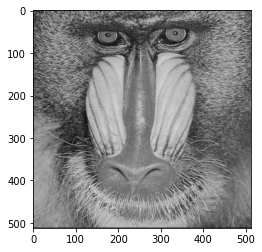

In [40]:
img_avg = cv.imread('/content/drive/MyDrive/mandrill.tiff')
# R + G + B / 3
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)

plt.imshow(img_avg)

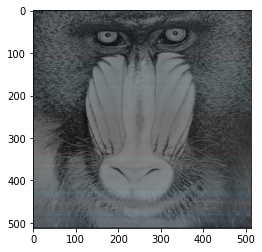

In [41]:
img_lightness = cv.imread('/content/drive/MyDrive/mandrill.tiff')
# max[R, G, B] + min[R, G, B] /2
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=100)/2 + np.min(img_lightness,axis=-2, keepdims=100)/3

plt.imshow(img_lightness)

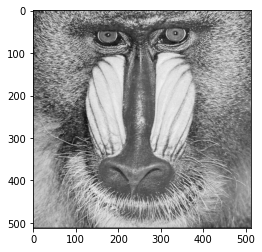

In [43]:
img_luminance = cv.imread('/content/drive/MyDrive/mandrill.tiff')
R, G, B = img_luminance[:,:,0], img_luminance[:,:,1], img_luminance[:,:,2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)

plt.imshow(gray_img_luminance, cmap="gray")

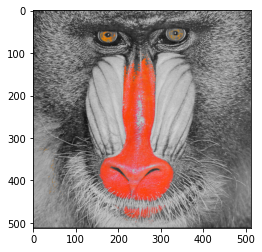

In [49]:
img_ro = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_ro = cv.cvtColor(img_ro,cv.COLOR_BGR2RGB)

condition = (img_ro[:,:,0] < 200) | (img_ro[:,:,1] > 140)
gray_values = np.mean(img_ro[condition], axis=1)

transformed = img_ro.copy()
transformed[condition] = gray_values[:, None]

plt.imshow(transformed)